In [1]:
# ! pip install mglearn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

In [4]:
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐방지

In [6]:
# 비지도 학습(unsupervised learning)

In [7]:
# 주성분 분석 : PCA

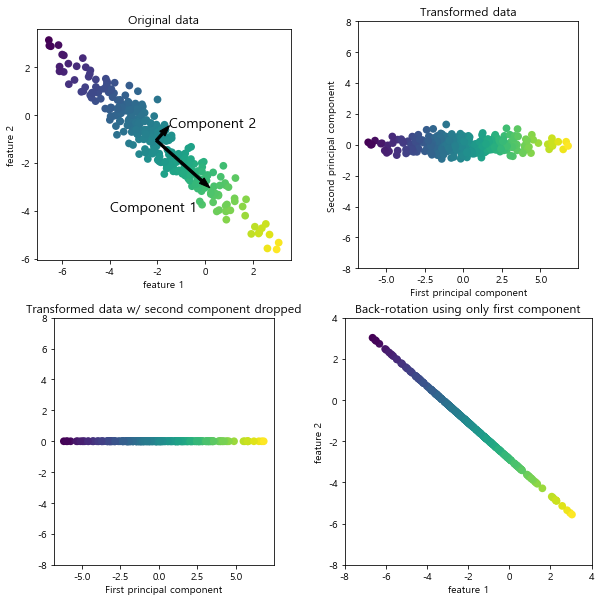

In [8]:
mglearn.plots.plot_pca_illustration()

In [9]:
from sklearn.datasets import load_breast_cancer

In [11]:
cancer = load_breast_cancer()

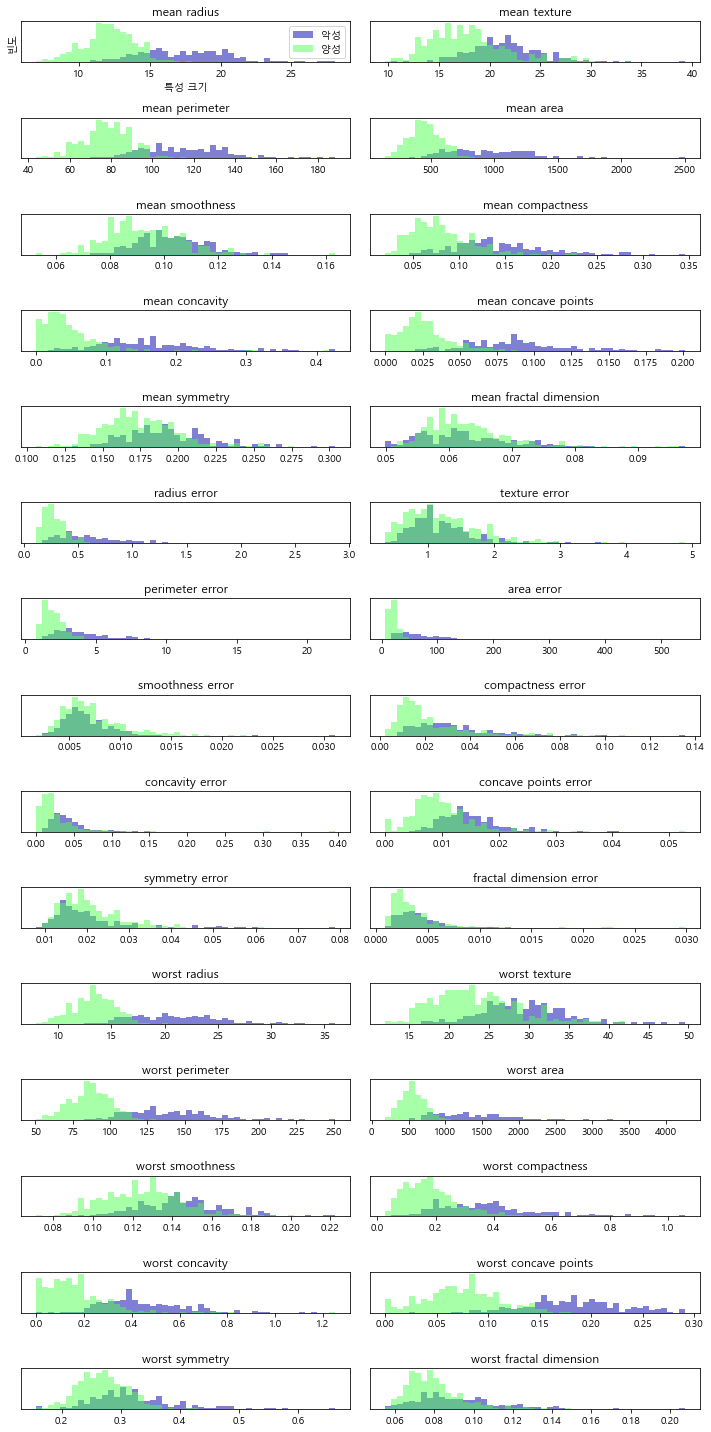

In [20]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
maligant = cancer.data[cancer.target == 0]  # 악성 : 암
benign = cancer.data[cancer.target == 1]    # 양성 : 정상
ax = axes.ravel()
for  i in range(30):  # 0 ~ 29
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(maligant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성","양성"], loc="best")
fig.tight_layout()

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [24]:
print("원본 데이터 형태:", str(X_scaled.shape))  # 원본 데이터 형태: (569, 30)
print("축소된 데이터 형태:", str(X_pca.shape))   # 축소된 데이터 형태: (569, 2)

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


In [25]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

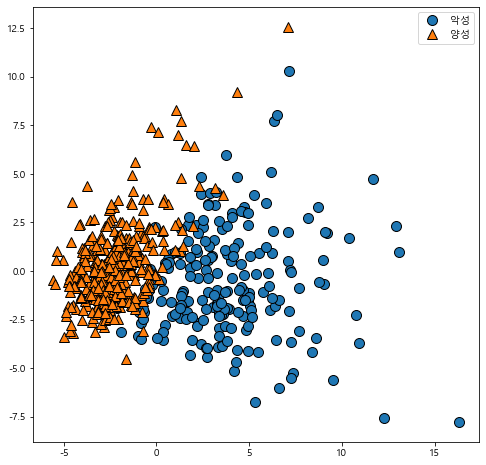

In [28]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(["악성","양성"], loc="best")
plt.show()

In [29]:
print("PCA 주성분 형태:", pca.components_.shape)
# PCA 주성분 형태: (2, 30)

PCA 주성분 형태: (2, 30)


In [32]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

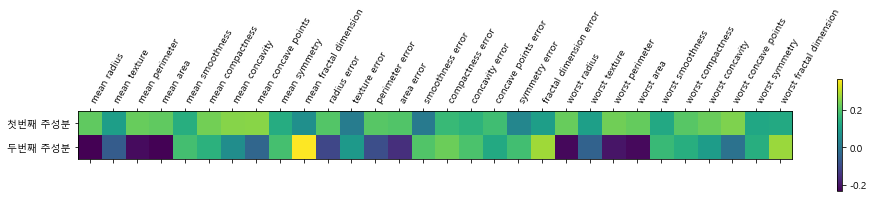

In [37]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫번째 주성분", "두번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.show()

In [38]:
# t-SNE : 차원 축소, 시각화

In [39]:
from sklearn.datasets import load_digits
digits = load_digits()

In [42]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [44]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

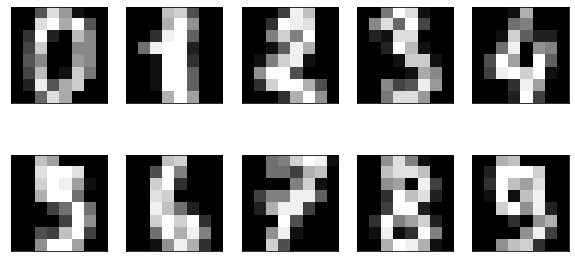

In [43]:
fig, axes = plt.subplots(2, 5, figsize=(10,5),
                        subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap='gray')

In [45]:
pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
digits_pca = pca.transform(digits.data)

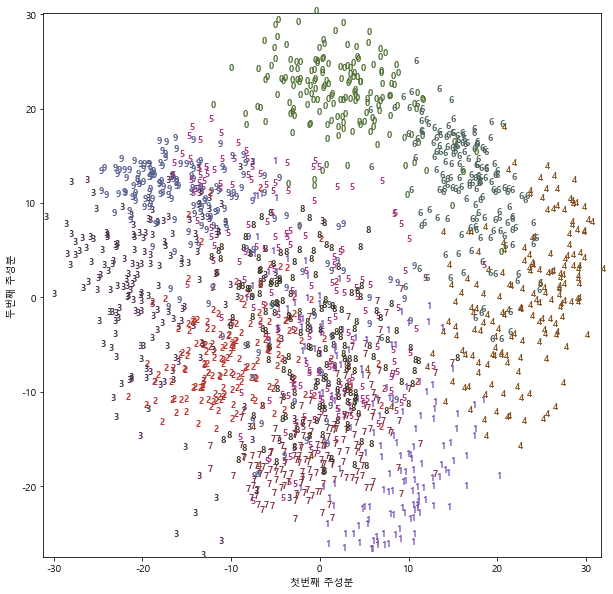

In [50]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
         "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={"weight":'bold', 'size':9})
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()

In [51]:
from sklearn.manifold import TSNE

In [52]:
tsne = TSNE(random_state=42)

In [53]:
digits_tsne = tsne.fit_transform(digits.data)

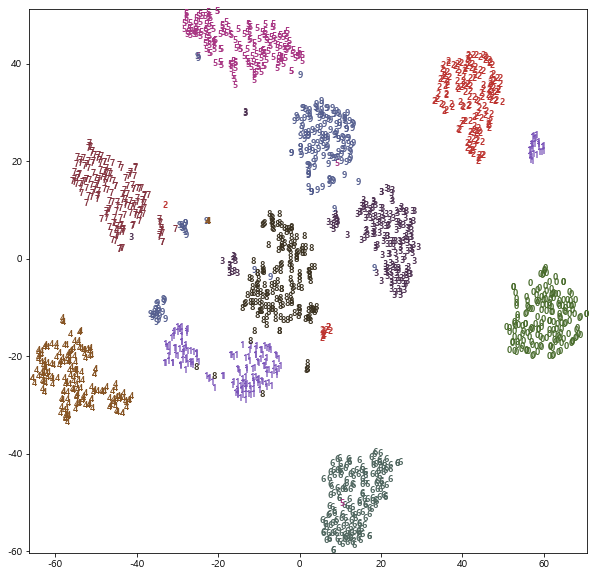

In [56]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={"weight":"bold","size":9})
plt.show()

In [57]:
# k-평균 군집 : k-mean clustering

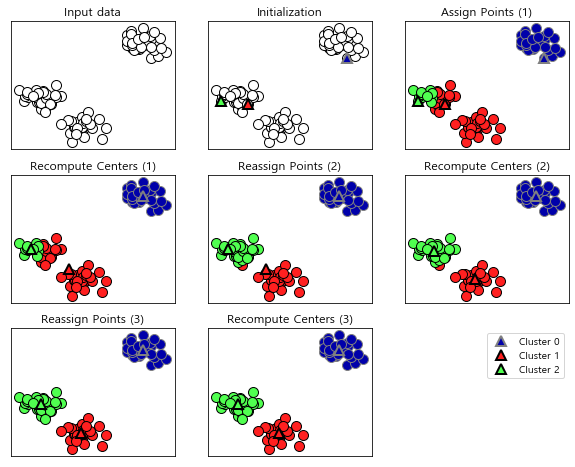

In [58]:
mglearn.plots.plot_kmeans_algorithm()

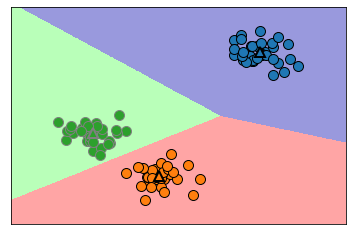

In [59]:
mglearn.plots.plot_kmeans_boundaries()

In [60]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(random_state=1)

In [63]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [64]:
print(kmeans.labels_)

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [66]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


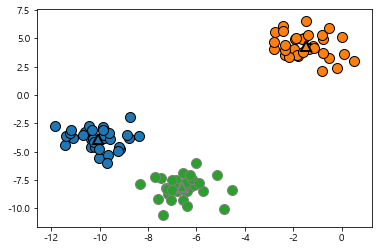

In [69]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers="o")
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                        [0,1,2], markers="^", markeredgewidth=2)
plt.show()

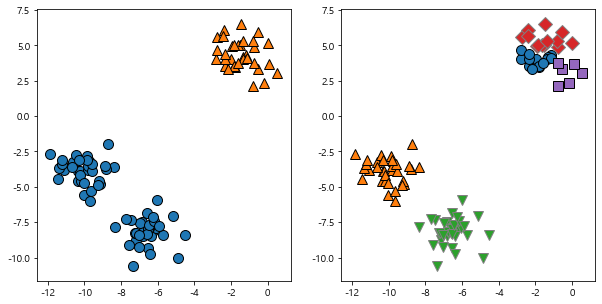

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assingnment = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assingnment, ax=axes[0])
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assingnment = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assingnment, ax=axes[1])
plt.show()

In [75]:
# KMeans vs AgglomerativeClusering vs DBSCAN

In [76]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [77]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

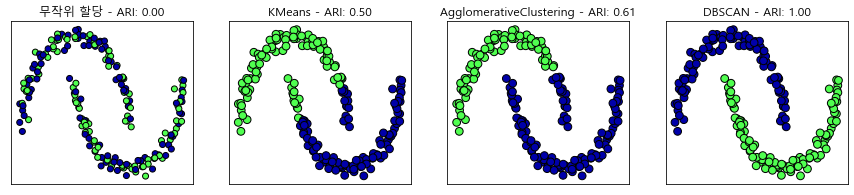

In [85]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                        subplot_kw={"xticks":(), "yticks": ()})
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
    adjusted_rand_score(y, random_clusters)))
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
               cmap=mglearn.cm3, edgecolors='black')
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters,
              cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                          adjusted_rand_score(y, clusters)))
plt.show()

In [86]:
# 데이터 표현과 특성 공학

In [87]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('datasets/adult.data', header=None, index_col=False,
                  names=names)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [88]:
data = df[['age','workclass','education','gender','hours-per-week',
          'occupation','income']]
data

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Female,38,Tech-support,<=50K
32557,40,Private,HS-grad,Male,40,Machine-op-inspct,>50K
32558,58,Private,HS-grad,Female,40,Adm-clerical,<=50K
32559,22,Private,HS-grad,Male,20,Adm-clerical,<=50K


In [89]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [93]:
print("원본 특성:\n", list( data.columns), "\n" )
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [94]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [96]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

In [97]:
X = features.values

In [98]:
y = data_dummies['income_ >50K'].values

In [100]:
X.shape, y.shape

((32561, 44), (32561,))

In [101]:
# 모델 생성 ==> 모델 훈련 ==> 모델 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("test accuracy: {:.2f}%".format(logreg.score(X_test, y_test) * 100))
# test accuracy: 80.68%

test accuracy: 80.68%


In [108]:
# scikit-learn 에서 범주형 데이터 다루기 : OneHotEncoder, ColumnTransformer

In [109]:
demo_df = pd.DataFrame({"num feature":[0,1,2,1],
                        "categorical feature":["socks","fox","socks","box"]})
demo_df

,num feature,categorical feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [111]:
pd.get_dummies(demo_df)

,num feature,categorical feature_box,categorical feature_fox,categorical feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [112]:
from sklearn.preprocessing import OneHotEncoder

In [113]:
ohe = OneHotEncoder(sparse=False)  # sparse=False : numpy array return
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


In [114]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [116]:
ct = ColumnTransformer(
    [
        ('scaling', StandardScaler(), ['age', 'hours-per-week']),
        ('onehot', OneHotEncoder(sparse=False),
             ['workclass', 'education', 'gender', 'occupation'])
    ])

In [119]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data_features = data.drop('income', axis=1)
data_features

,age,workclass,education,gender,hours-per-week,occupation
0,39,State-gov,Bachelors,Male,40,Adm-clerical
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial
2,38,Private,HS-grad,Male,40,Handlers-cleaners
3,53,Private,11th,Male,40,Handlers-cleaners
4,28,Private,Bachelors,Female,40,Prof-specialty
...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Female,38,Tech-support
32557,40,Private,HS-grad,Male,40,Machine-op-inspct
32558,58,Private,HS-grad,Female,40,Adm-clerical
32559,22,Private,HS-grad,Male,20,Adm-clerical


In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

In [121]:
ct.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaling',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['age', 'hours-per-week']),
                                ('onehot',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=False),
                                 ['workclass', 'education', 'gender',
                                  'occupation'])],
                  verbose=False)

In [122]:
X_train_trans = ct.transform(X_train)

In [123]:
X_train_trans.shape

(24420, 44)

In [124]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
X_test_trans = ct.transform(X_test)

In [129]:
print("test acc: {:.2f}%".format(logreg.score(X_test_trans, y_test) * 100))
# test acc: 80.92%

test acc: 80.92%


In [130]:
# make_column_transformer 사용

In [131]:
from sklearn.compose import make_column_transformer

In [132]:
# ct = ColumnTransformer(
#     [
#         ('scaling', StandardScaler(), ['age', 'hours-per-week']),
#         ('onehot', OneHotEncoder(sparse=False),
#              ['workclass', 'education', 'gender', 'occupation'])
#     ])

In [133]:
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass','education','gender','occupation']))

In [134]:
# SVR 실습

In [135]:
X, y = mglearn.datasets.make_wave(n_samples=120)

In [139]:
import numpy as np

In [140]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [138]:
from sklearn.svm import SVR

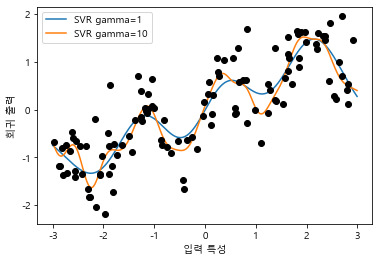

In [144]:
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:,0], y, 'o', c='k')
plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc="best")
plt.show()

In [145]:
# 모델 평가와 성능 향상

In [146]:
# cross validation

In [147]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("test acc: {:.2f}%".format(logreg.score(X_test, y_test)*100))
# test acc: 88.00%

test acc: 88.00%


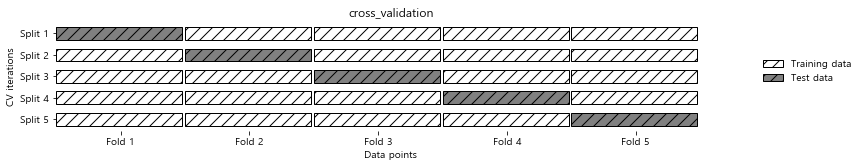

In [148]:
mglearn.plots.plot_cross_validation()

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)
# 교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [150]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=7)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.95454545 1.         0.90909091 0.95238095 0.95238095 1.
 1.        ]


In [152]:
print("교차 검증 평균:", scores.mean())

교차 검증 평균: 0.9669140383426098


In [154]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
res

{'fit_time': array([0.03097939, 0.03797579, 0.03398132, 0.05296874, 0.04297304]),
 'score_time': array([0.00099945, 0.00099969, 0.00100064, 0.00099707, 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [155]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

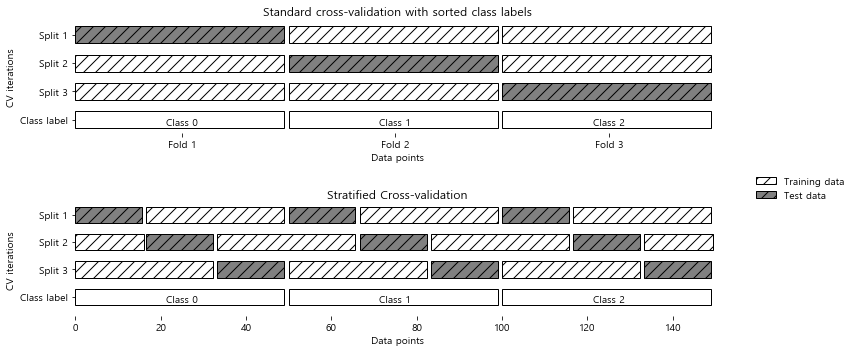

In [156]:
mglearn.plots.plot_stratified_cross_validation()

In [157]:
from sklearn.model_selection import KFold

In [158]:
kfold = KFold(n_splits=5)

In [159]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [160]:
kfold = KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)
# array([0., 0., 0.])  # 학습이 안됨!

array([0., 0., 0.])

In [161]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)
# array([0.98, 0.96, 0.96])  # 성공

array([0.98, 0.96, 0.96])

In [163]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수:", len(scores))
print("평균 정확도: {:.2f}%".format(scores.mean()*100))

교차 검증 분할 횟수: 150
평균 정확도: 96.67%


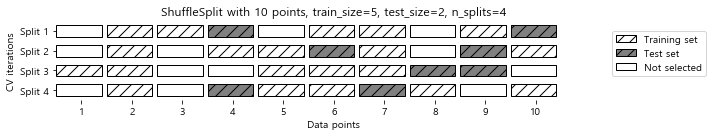

In [164]:
mglearn.plots.plot_shuffle_split()

In [165]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
scores

array([0.97333333, 0.93333333, 0.93333333, 0.97333333, 0.96      ,
       0.94666667, 0.94666667, 0.90666667, 0.92      , 0.96      ])

In [166]:
# 그리드 서치(Grid Search)

In [170]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print(X_train.shape, X_test.shape)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc = SVC(gamma=gamma, C=C)
        svc.fit(X_train, y_train)
        score = svc.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {"C":C,"gamma":gamma}
print("best score: {:.2f}%".format(best_score*100))
print("best parametes:", best_parameters)

(112, 4) (38, 4)
best score: 97.37%
best parametes: {'C': 100, 'gamma': 0.001}


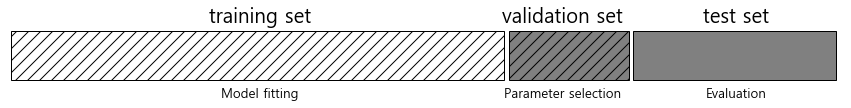

In [171]:
mglearn.plots.plot_threefold_split()

In [173]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print(X_train.shape, X_valid.shape, X_test.shape)

(84, 4) (28, 4) (38, 4)


In [174]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc = SVC(gamma=gamma, C=C)
        svc.fit(X_train, y_train)
        score = svc.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 최고 점수: {:.2f}%".format(best_score*100))
print("best parameters:", best_parameters)
print("best parameters test acc: {:.2f}%".format(test_score*100))

검증 최고 점수: 96.43%
best parameters: {'C': 10, 'gamma': 0.001}
best parameters test acc: 92.11%


In [175]:
# 교차 검증을 사용한 그리드 서치

In [179]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svc, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {"C":C, "gamma":gamma}
svc = SVC(**best_parameters)
svc.fit(X_trainval, y_trainval)
svc.score(X_test, y_test)

0.9736842105263158

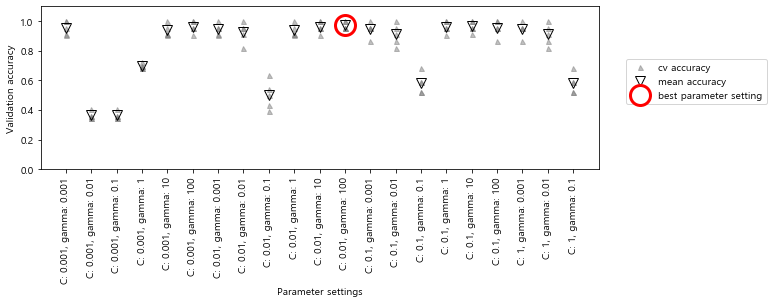

In [180]:
mglearn.plots.plot_cross_val_selection()

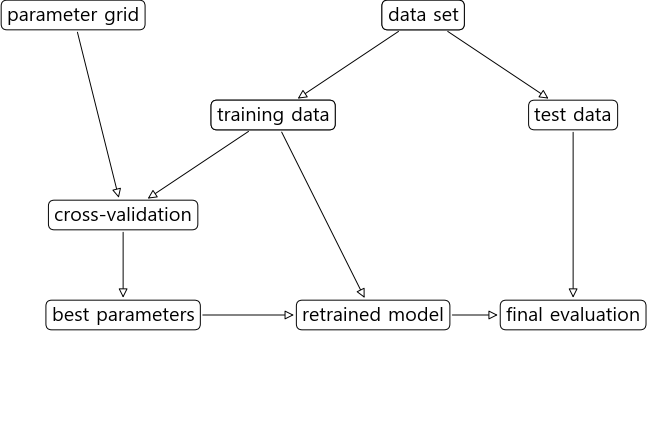

In [181]:
mglearn.plots.plot_grid_search_overview()

In [194]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=0)
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100],
             "gamma":[0.001, 0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("test acc: {:.2f}%".format(grid_search.score(X_test, y_test)*100))
print("best parameters:", grid_search.best_params_)
print("최고의 교차 검증 점수: {:.2f}".format(grid_search.best_score_ * 100))

test acc: 97.37%
best parameters: {'C': 10, 'gamma': 0.1}
최고의 교차 검증 점수: 97.31


In [195]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001199,3.988049e-04,0.000599,4.890061e-04,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000800,3.999235e-04,0.000400,4.901549e-04,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000800,4.000190e-04,0.000200,3.998756e-04,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.001000,7.136645e-07,0.000400,4.893956e-04,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.001199,4.000188e-04,0.000800,3.998521e-04,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
5,0.001200,3.994707e-04,0.000600,4.895510e-04,0.001,100,"{'C': 0.001, 'gamma': 100}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
6,0.000799,7.478185e-04,0.000600,4.895121e-04,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
7,0.000800,7.478825e-04,0.000799,3.996850e-04,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
8,0.001199,3.998758e-04,0.000799,3.996850e-04,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
9,0.001399,4.899021e-04,0.000600,4.896679e-04,0.01,1,"{'C': 0.01, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


In [197]:
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.00119939,0.000799847,0.000800037,0.00099988,0.00119886
std_fit_time,0.000398805,0.000399923,0.000400019,7.13665e-07,0.000400019
mean_score_time,0.000598907,0.000400209,0.000199938,0.00039959,0.000799704
std_score_time,0.000489006,0.000490155,0.000399876,0.000489396,0.000399852
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


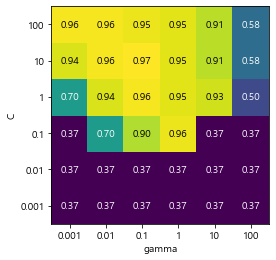

In [198]:
scores = np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                     ylabel='C', yticklabels=param_grid['C'], cmap='viridis')
plt.show()

In [199]:
# day05 end